<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_9_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

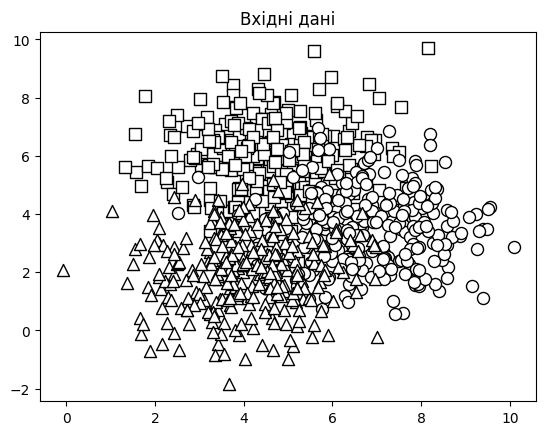

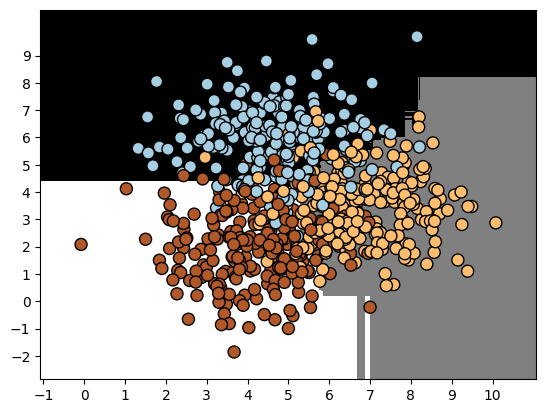

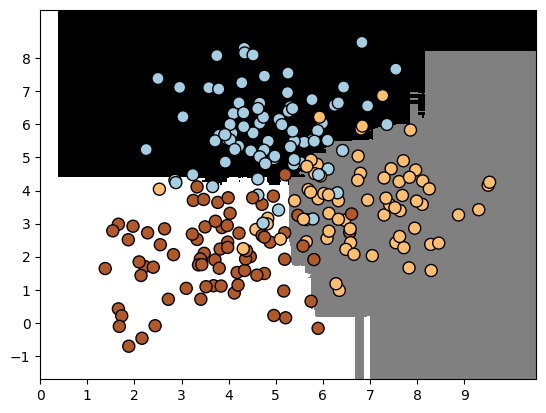


########################################

Класифікатор на навчальному наборі даних

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

Класифікатор на тестовому наборі даних

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

########################################

Confidence measure:

Datapoin

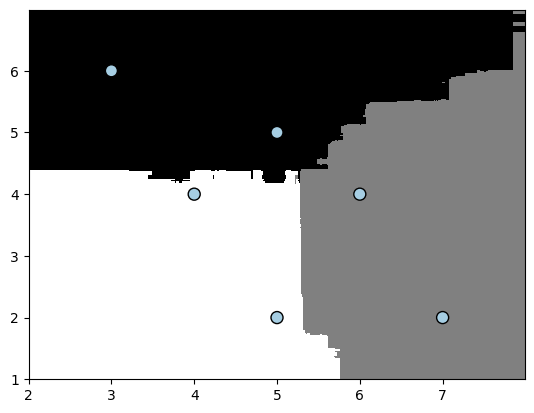

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from utilities import visualize_classifier

classifier_type = 'rf'  # 'rf' = Random Forest, 'erf' = Extremely Randomized Forest

# === Завантаження вхідних даних ===
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# === Розбиття на класи для візуалізації ===
class_0 = X[y == 0]
class_1 = X[y == 1]
class_2 = X[y == 2]

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='^')
plt.title('Вхідні дані')
plt.show()

# === Розбиття на навчальний та тестовий набори ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# === Параметри класифікатора ===
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)

# === Навчання та візуалізація ===
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train) #Training dataset

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test) #Тестовий набір даних

class_names = ['Class-0', 'Class-1', 'Class-2']
print("\n" + "#" * 40)
print("\nКласифікатор на навчальному наборі даних\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#" * 40)

print("\nКласифікатор на тестовому наборі даних\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#" * 40)

# === Розрахунок рівнів довірливості ===
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Predicted class:', predicted_class)

visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints)) #Тестові точки даних
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_random_forests.txt to data_random_forests.txt
